# Исследование сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

   * без подписки
        - абонентская плата отсутствует;
        - стоимость одной минуты поездки — 8 рублей;
        - стоимость старта (начала поездки) — 50 рублей;
   * с подпиской Ultra
        - абонентская плата — 199 рублей в месяц;
        - стоимость одной минуты поездки — 6 рублей;
        - стоимость старта — бесплатно.
        
**Цель исследования -**

Изучить данные о пользователях и поездках сервиса аренды самокатов обеих групп (с подпиской *ultra* и *free*) и проверить гипотезы о продолжительности, расстоянии поездок и затратах пользователей.

**Ход исследования**

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных: описание и визуализация общей информации о пользователях и поездках
4. Объединение данные для дальнейшего анализа
5. Подсчёт выручки
6. Проверка гипотез
7. Распределение (доп. исследование)

**Описание данных**

Пользователи — users_go.csv

   - user_id	- уникальный идентификатор пользователя
   - name - имя пользователя
   - age	- возраст
   - city - город
   - subscription_type - тип подписки (free, ultra)

Поездки — rides_go.csv

   - user_id - уникальный идентификатор пользователя
   - distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
   - duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
   - date - дата совершения поездки

Подписки — subscriptions_go.csv

   - subscription_type - тип подписки
   - minute_price - стоимость одной минуты поездки по данной подписке
   - start_ride_price - стоимость начала поездки
   - subscription_fee - стоимость ежемесячного платежа

### Шаг 1. Загрузка данных

#### Импорт библиотек и чтение  данных из csv-файла 

In [1]:
# импорт библиотеки pandas
import pandas as pd 
#импорт библиотеки numpy
import numpy as np
#импорт библиотеки seaborn
import seaborn as sns
#импорт библиотеки matplotlib
import matplotlib.pyplot as plt
#импорт библиотеки math
from math import factorial
from math import sqrt
#статистика
from scipy import stats as st
from scipy.stats import binom, norm

#чтение файлов с данными и сохранение в переменные df, df_1, df_2
df = pd.read_csv ('/datasets/users_go.csv')
df_1 = pd.read_csv ('/datasets/rides_go.csv')
df_2 = pd.read_csv ('/datasets/subscriptions_go.csv')

#### Вывод первых строк каждого набора данных, изучение общей информации

In [2]:
#получение первых 5 строк таблицы df
df.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
# получение общей информации о данных таблицы df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В датафрейме *df* содержится информация о пользователях сервиса аренды самокатов GoFast (5 столцов и 1565 записей). Тип данных корректный.

In [4]:
#получение первых 5 строк таблицы df_1
df_1.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
# получение общей информации о данных таблицы df_1
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В датафрейме *df_1* содержится информация о поездках пользователей сервиса аренды самокатов GoFast (4 столца и 18068 записей). Тип данных в столбце date неккоректный.

In [6]:
#получение первых 5 строк таблицы df_2
df_2.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
# получение общей информации о данных таблицы df_2
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В датафрейме *df_2* содержится информация о тарифах подписок *free* и *ultra* аренды самокатов GoFast. Тип данных корректен.

### Шаг 2. Предобработка данных

#### Изменение типов данных

На предыдущей шаге мы обнаружили некорректный тип данных в 1 столбце с датой. Приведем к типу даты столбец date из таблицы df_1 (поездки). 

In [8]:
#изменение типа данных
df_1['date'] = df_1['date'].astype('datetime64[M]') 

#### Создание нового столбца с номером месяца на основе столбца date

In [9]:
#создание нового столбца с номером месяца
df_1['month'] = df_1['date'].dt.month

#### Проверка наличия пропущенных значений и дубликатов в датафреймах. 

In [10]:
#подсчет пропусков в таблице df
df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
#подсчет пропусков в таблице df_1
df_1.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [12]:
#подсчет пропусков в таблице df_2
df_2.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенных значений не обнаружено. 

In [13]:
# подсчёт явных дубликатов в df
df.duplicated().sum() 

31

In [14]:
# удаление явных дубликатов, создание новых индексов и удаление старых
df = df.drop_duplicates().reset_index(drop=True)
#проверка
df.duplicated().sum() 

0

In [15]:
# подсчёт явных дубликатов в df_1
df_1.duplicated().sum() 

0

In [16]:
# подсчёт явных дубликатов в df_2
df_2.duplicated().sum() 

0

Явных дубликатов не обнаружено.

Далее посмотрим есть ли неявные дубликаты в названиях городов пользователей.

In [17]:
#просмотр количества уникальных названий
print(df['city'].nunique())
df['city'].unique()

8


array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

#### Вывод

В ходе предобработки данных:

   - изменен тип данных столбца date в таблице df_1 (поездки)
   - создан новый столбец 'month' с номером месяца в таблице df_1 (поездки)
   - выяснили, что пропущенные значения и неявные дубликаты отсутствуют 
   - в таблице df (пользователи) обнаружены и удалены явные дубликаты.

### Шаг 3. Исследовательский анализ данных

Описание и визуализация общей информации о пользователях и поездках:

#### Частота встречаемости городов

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


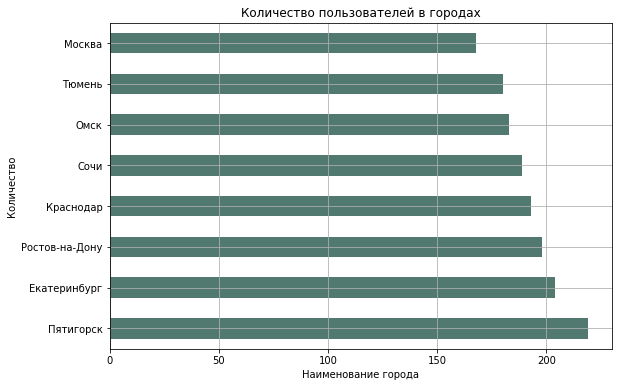

In [18]:
#сводная таблица количества пользователей в разных городах
df_city = (
    df.pivot_table
    (index='city', 
     values='user_id', 
     aggfunc='count')
    .sort_values(by='user_id', ascending=False)
)
#вывод свобной таблицы
display(df_city)
#визуализация
df_city.plot(kind='barh', legend=False, grid=True, color='#52796f', figsize=(9, 6))

# настройки внешнего вида графика
plt.title('Количество пользователей в городах')
plt.xlabel('Наименование города')
plt.ylabel('Количество')
#показ графика
plt.show()

Интересно, в Москве пользователей арендных самокатов наименьшее количество. 

#### Соотношение пользователей с подпиской и без подписки

,user_id
subscription_type,
free,835
ultra,699


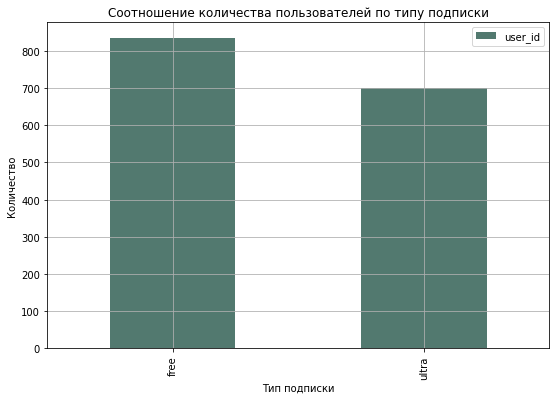

In [19]:
#сводная таблица количества пользователей с подпиской и без нее
df_subscription = (
        df.pivot_table
    (index='subscription_type', 
     values='user_id', 
     aggfunc='count')
    )
#вывод свобной таблицы
display(df_subscription)
#визуализация
df_subscription.plot(kind='bar',
          legend=True,
          grid=True,
          figsize=(9,6),
          color='#52796f')

# настройки внешнего вида графика
plt.title('Соотношение количества пользователей по типу подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество')
#показ графика
plt.show()

Пользователей с подпиской Ultra немного меньше, чем пользователей без подписки.

#### Возраст пользователей

In [20]:
#посмотрим на статистику столбца 'age'
df['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

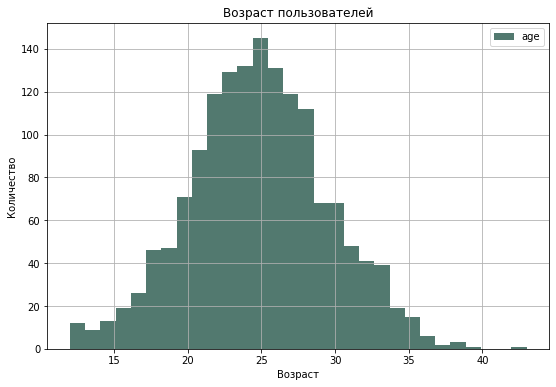

In [21]:
#строим гистограмму
df['age'].hist(bins=30, legend=True, grid=True, color='#52796f', figsize=(9,6))

# настройки внешнего вида графика
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
#показ графика
plt.show()

Большинство пользователей, арендующих самокаты это молодые люди в возрасте от 20 до 30 лет. Также в выборке присутсвуют несовершеннолетние лица, что противеоречит законодательству РФ. Но так как выборка у нас за 2021 год, вероятно в те года еще не было запрета на пользование самокатов детьми. На сегодняшний момент сервису необходимо убедиться в наличии ограничений по возрасту, чтобы исключить нарушения.

#### Расстояние, которое пользователь преодолел за одну поездку

In [22]:
#посмотрим на статистику столбца 'distance'
df_1['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

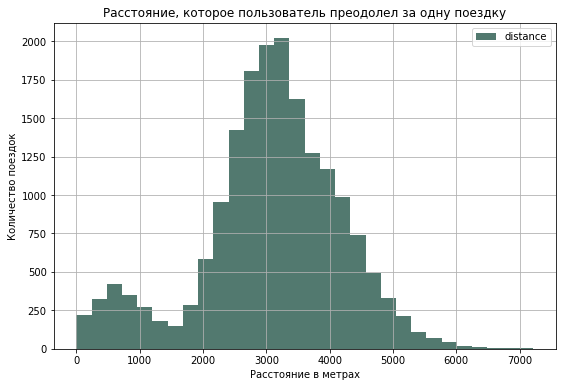

In [23]:
df_1['distance'].hist(bins=30, legend=True, grid=True, color='#52796f', figsize=(9,6))

# настройки внешнего вида графика
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
#показ графика
plt.show()

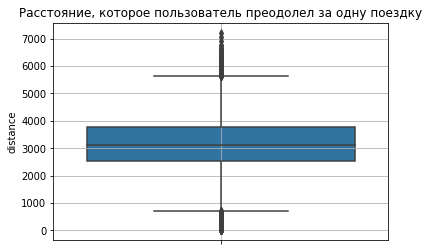

In [24]:
#строим диаграмму размаха 
sns.boxplot(y='distance', data=df_1)
# настройки внешнего вида графика
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.grid(True)
plt.figsize=(9, 6)
#показ графика
plt.show()

В среднем пользователи преодолевают 3070 м за одну поездку, медиана - 3133 м. Поездки с расстоянием менее 800 м можно назвать короткими, больше 5700 м самыми длительными.

Причинами слишком коротких поездок могут быть:
- пользователь забыл сразу завершить поездку
- неисправность самоката
- пользователь отвлекся на звонок, либо по пути зашел в магазин и не остановил поездку

#### Продолжительность поездок

In [25]:
#посмотрим на статистику столбца 'duration'
df_1['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

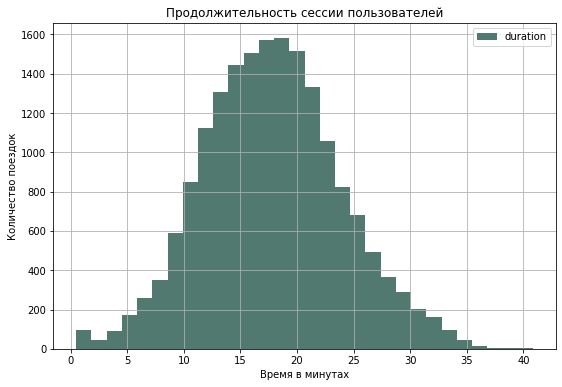

In [26]:
df_1['duration'].hist(bins=30, legend=True, grid=True, color='#52796f', figsize=(9,6))

# настройки внешнего вида графика
plt.title('Продолжительность сессии пользователей')
plt.xlabel('Время в минутах')
plt.ylabel('Количество поездок')
#показ графика
plt.show()

17 минут - столько в среднем длится сессия. По графику мы видим, что есть использовние самокатов менее 1 минуты, вероятно это связано с  попыткой пользователя подключения к самокатам впервые или с желанием взять другой самокат, либо вовсе использовать другой способ передвижения.

#### Вывод

По результатам исследовательского анализа была получена следующая информация:

1.	Сервис аренды самокатов GoFast предоставляется в 8 городах России, в Пятигорске наибольшее количество пользователей – 219, в Москве наименьшее – 168. 
2.	Пользователей без подписки 835, подпиской *ultra* пользуются 699 пользователей.
3.	Услугами сервиса пользуются лица от 12 до 43 лет, среднестатистическому пользователю 25 лет.
4.	Расстояние 1 поездки варьируется от 0,8 до 7211 м, медианное значение – 3133 м. Поездки с расстоянием менее 800 м можно считать короткими, более 5700 м длительными.
5.	Продолжительность поездок распределяется от 0,5 до 40 минут. Среднее и медиана равны 17 минутам. Также наблюдаются слишком быстрые поездки менее 1 минуты, далее посмотрим с чем это может быть связано.

### Шаг 4. Объединение данных

#### Объединение данные о пользователях, поездках и подписках в один датафрейм

In [27]:
#объединение данных в один датафрейм
data = df.merge(df_1, on='user_id').merge(
    df_2, on='subscription_type')
#вывод первых строк объединенной таблицы data
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-01,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-01,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-01,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-01,8,6,0,199


In [28]:
# получение общей информации о данных таблицы data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


С помощью метода `merge` объединили исходные три датафрейма. Объединенная таблица имеет 12 столбцов и 18068 записей, теперь вся информация в одном месте, удобно. 

#### Создание двух датафреймов из датафрейма, созданного на этапе 4.1:
    c данными о пользователях без подписки;
    с данными о пользователях с подпиской.

In [29]:
#создание нового датафрейма по условию пользователи без подписки
data_free = data.query('subscription_type=="free"')
#вывод первых строк data_free
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-01,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-01,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-01,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-01,2,8,50,0


In [30]:
#создание нового датафрейма по условию пользователи с подпиской
data_ultra = data.query('subscription_type=="ultra"')
#вывод первых строк data_ultra
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-01,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-01,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-01,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-01,8,6,0,199


Разделение пользователей по условию выполнено.

#### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

***График для расстояния поездок для пользователей обеих категорий:***

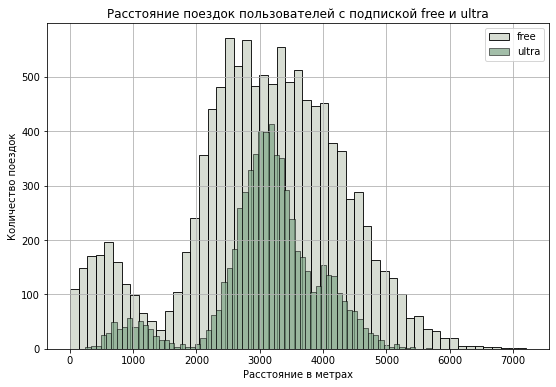

In [31]:
#создаем фигуру 
plt.subplots(figsize=(9, 6))

#строим гистограммы
sns.histplot(data_free['distance'], label='free', color='#cad2c5', )
sns.histplot(data_ultra['distance'], label='ultra', color='#84a98c')

# добавляем легенду
plt.legend()
# рисуем сетку
plt.grid()
# настройки внешнего вида графика
plt.title('Расстояние поездок пользователей с подпиской free и ultra')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
#показ графика
plt.show()

Пользователи без подписки преодолевают как самые короткие дистанции, так и самые продолжительные, в сравнении с пользователями с подпиской. 

***График для продолжительности поездок для пользователей обеих категорий:***

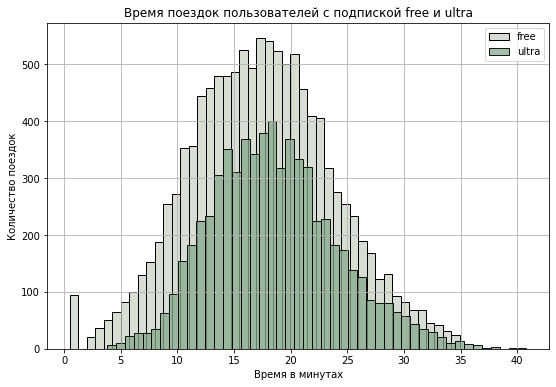

In [32]:
#создаем фигуру 
plt.subplots(figsize=(9, 6))

#строим гистограммы
sns.histplot(data_free['duration'], label='free', color='#cad2c5', )
sns.histplot(data_ultra['duration'], label='ultra', color='#84a98c')

# добавляем легенду
plt.legend()
# рисуем сетку
plt.grid()
# настройки внешнего вида графика
plt.title('Время поездок пользователей с подпиской free и ultra')
plt.xlabel('Время в минутах')
plt.ylabel('Количество поездок')
#показ графика
plt.show()

У пользователей без подписки больше коротких по времени поездок, что логично, они только знакомятся с услугами сервиса. 

In [33]:
#описательная статистика расстояний и времени поездок для пользователей без подписки
display(data_free[['distance', 'duration']].describe())
#описательная статистика расстояний и времени поездок для пользователей с подпиской
data_ultra[['distance', 'duration']].describe()

,distance,duration
count,11568.000000,11568.000000
mean,3045.495282,17.390909
std,1246.173806,6.326803
min,0.855683,0.500000
25%,2366.562689,12.958437
50%,3114.648465,17.326890
75%,3905.697894,21.594071
max,7211.007745,34.948498


,distance,duration
count,6500.000000,6500.000000
mean,3115.445388,18.541985
std,836.895330,5.572048
min,244.210438,3.760353
25%,2785.444017,14.524654
50%,3148.637229,18.178153
75%,3560.574425,21.884129
max,5699.769662,40.823963


Количество поездок у пользователей без подписки (11568) больше, чем количество поездок с подпиской (6500). Более равномерное распределение мы можем наблюдать на графиках у пользователей с подпиской *ultra*.

#### Вывод: 

Из визуализации и описательной статистики о расстоянии и продолжительности поездок пользователей с подпиской и без можем выделить следующее:

- поездок с использованием подписки меньше, распределение равномернее;
- расстояние поездок существенно разнятся, в случае использования подписки минимальное расстояние начинается с 244 м, максимальное – 5699 м. Без использования подписки наблюдаем наличие слишком коротких 0.85 м и длительных поездок 7211 м;
- минимальная продолжительность поездок без использования подписки - 0,5 мин, максимальное – 35 мин. Пользователи с подпиской же пользуются от 3 и до 40 минут.

### Шаг 5. Подсчёт выручки

#### Суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [34]:
#округление продолжительности поездок с помощью «потолка»
data['duration'] = np.ceil(data['duration'])
#округление расстояния поездок до 2 знаков после запятой
data['distance'] = round(data['distance'],2)
#создание датафрема с агрегированными данными о расстоянии и времени поездок
revenue = data.pivot_table(
    index=('user_id', 'month'),
    values=('distance',
            'duration',
            'minute_price',
            'start_ride_price',
            'subscription_fee'),
    aggfunc=({'distance':{'count','sum'},
              'duration':'sum',
              'minute_price':'mean',
              'start_ride_price':'mean',
              'subscription_fee':'mean'})
).rename(columns={'distance':'distance_sum',
                  'duration':'duration_sum',})
#названия столбцов вместо двойных 
revenue.columns = [
    'count',
    'distance_sum',
    'duration_sum',
    'minute_price',
    'start_ride_price',
    'subscription_fee'
]
#вывод таблицы
revenue

count  distance_sum  duration_sum  minute_price  \
user_id month                                                    
1       1          2       7027.51          42.0             6   
        4          1        754.16           7.0             6   
        8          2       6723.47          46.0             6   
        10         2       5809.91          32.0             6   
        11         3       7003.50          56.0             6   
...              ...           ...           ...           ...   
1534    6          2       3409.47          26.0             8   
        8          2       7622.45          48.0             8   
        9          1       4928.17          23.0             8   
        11         4      13350.02          78.0             8   
        12         1       2371.71          16.0             8   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199  
...                         ...               ...  
1534    6                    50                 0  
        8                    50                 0  
        9                    50                 0  
        11                   50                 0  
        12                   50                 0  

[11331 rows x 6 columns]

#### Помесячная выручка по каждому пользователю

In [35]:
#создаем новый столбец с подсчетом помесячной выручки по каждому пользователю
revenue['monthly_revenue'] = (
    (revenue['start_ride_price']*revenue['count']) + 
    (revenue['minute_price']*revenue['duration_sum']) + 
    revenue['subscription_fee']
)
#вывод таблицы revenue
revenue

count  distance_sum  duration_sum  minute_price  \
user_id month                                                    
1       1          2       7027.51          42.0             6   
        4          1        754.16           7.0             6   
        8          2       6723.47          46.0             6   
        10         2       5809.91          32.0             6   
        11         3       7003.50          56.0             6   
...              ...           ...           ...           ...   
1534    6          2       3409.47          26.0             8   
        8          2       7622.45          48.0             8   
        9          1       4928.17          23.0             8   
        11         4      13350.02          78.0             8   
        12         1       2371.71          16.0             8   

               start_ride_price  subscription_fee  monthly_revenue  
user_id month                                                       
1       1                     0               199            451.0  
        4                     0               199            241.0  
        8                     0               199            475.0  
        10                    0               199            391.0  
        11                    0               199            535.0  
...                         ...               ...              ...  
1534    6                    50                 0            308.0  
        8                    50                 0            484.0  
        9                    50                 0            234.0  
        11                   50                 0            824.0  
        12                   50                 0            178.0  

[11331 rows x 7 columns]

#### Вывод

В новом датафрейме *revenue* содержится информация о том, сколько денег и в какой месяц потратил пользователь на аренду самокатов.

### Шаг 6. Проверка гипотез

#### Тратят ли пользователи с подпиской больше времени на поездки? 

Сформулируем гипотезы.

Нулевая гипотеза:

   - H0: Средние продолжительности поездок пользователей из двух групп равны
    
Альтернативная гипотеза:

   - H1: Средняя продолжительность поездок пользователей с подпиской *ultra* больше, чем средняя продолжительность поездок пользователей без подписки

In [36]:
#выбранный уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    data_ultra['duration'],
    data_free['duration'],
    alternative='greater')

#выведем полученное p-value
print('p-значение:', results.pvalue)

#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости (близко к 0), поэтому нулевая гипотеза отвергнута.

#### Оптимальное расстояние одной поездки с точки зрения износа самоката

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Сформулируем гипотезы.

Нулевая гипотеза:

   - H0: Среднее расстояние одной поездки пользователей с подпиской равна 3130 метров
    
Альтернативная гипотеза:

   - H1: Среднее расстояние одной поездки пользователей с подпиской больше 3130 метров

In [37]:
distance = 3130
#выбранный уровень статистической значимости
alpha = 0.05

results = st.ttest_1samp(
    data_ultra['distance'], 
    distance,
    alternative='greater')

#выведем полученное p-value
print('p-значение:', results.pvalue)

#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value больше заданного уровня значимости, поэтому нулевую гипотезу не отвергаем. Есть основание утверждать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

#### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Сформулируем гипотезы.

Нулевая гипотеза:

H0: Средняя помесячная выручка от пользователей с подпиской по месяцам равна средней помесячной выручке от пользователей без подписки

Альтернативная гипотеза:

H1: Средняя помесячная выручка от пользователей с подпиской по месяцам выше средней помесячной выручке от пользователей без подписки

In [38]:
#выбранный уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    revenue[revenue['subscription_fee']>0]['monthly_revenue'],
    revenue[revenue['subscription_fee']==0]['monthly_revenue'],
    alternative='greater')

#выведем полученное p-value
print('p-значение:', results.pvalue)

#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основание утверждать, что средняя помесячная выручка от пользователей с подпиской по месяцам выше.

#### Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для данной проверки я предложила би использовать двухвыборочный t-тест для зависимых (парных) выборок.

Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем примере это количество обращений для каждого пользователя — до и после обновления серверов.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых выборок в Python, применяется метод `scipy.stats.ttest_rel()` с проверкой левосторонней альтернативной гипотезы *(alternative='less')*, так как нам необходимо проверить снизило ли количество обращений в техподдержку обновление серверов.

#### Вывод

В ходе проверки трех гипотез:
- гипотеза о равенстве средней продолжительности поездок пользователей из двух групп отвергнута
- можем утверждать о том,что среднее расстояние, которое проезжают пользователи с подпиской *ultra* за одну поездку, не превышает 3130 метров, что оптимально с точки зрения износа самокатов
- сервис аренды самокатов GoFast получает выручку выше от пользователей с подпиской *ultra* 

### Шаг 7. Распределения

#### Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %?

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей.

Выяснили, что подписку продлевают 10%, то есть вероятность успеха равна 0.1. Тогда вероятность неудачи по схеме Бернулли равна 1−0.1=0.9.

Как минимум 100 существующих клиентов должны продлить эту подписку. 

Допустим, сервис отправляет 1000 промокодов, n=1000.

Посчитаем вероятность того, что будут продлены 100 подписок из 1000:

In [39]:
n = 1000
k = 100
p = 0.1
result = 1 - binom.cdf(k, n, p)
result

0.4734009187048347

Вероятность продления 47%, теперь найдем количество промокодов с вероятностью выполнения плана 95%.

In [40]:
while 0.95 > (1 - binom.cdf(k, n, p)):
    n += 1
n

1172

1172 - столько промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.

#### С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. 

In [41]:
#количество уведомлений
n = 1000000
#вероятность
p = 0.4

#математическое ожидание
mu = n * p 
#стандартное отклонение
sigma = sqrt(n * p * (1 - p))

#задаём нормальное распределение
distr = st.norm(mu, sigma)

#считаем вероятность хвоста слева от 399,5 тысяч
result = distr.cdf(399500)
print(result)

0.15371708296369768


Вероятность того, что уведомления откроют не более 399,5 пользователей составляет 15,37%.

### Общий вывод

В ходе нашего исследования были выполенены следующие шаги:

1. Изучение общей информации пользователях и поездках сервиса аренды самокатов GoFast:

    - в таблице о пользователях 1565 записей и 5 столбцов
    - в таблице о поездках 18068 записей и 4 столбца
    - в таблице о тарифах 2 записи и 4 столбца
    - в 1 столбце из таблицы о поездках некорректный тип данных
    - пропущенных значений не обнаружено
    - в таблице о пользователях количество явных дубликатов 31


2. Изменен тип данных столбца ‘date ‘в таблице о поездках на тип даты, удалены явные дубликаты в столбце 'user_id' в таблице о пользователях и создан новый столбец 'month' с номером месяца в таблице о поездках.


3. Описание и визуализация общей информации о пользователях и поездках:

    - из 8 городов Пятигорск лидирует по количеству пользователей сервиса – 219, на втором месте Екатеринбург – 204, наименьшее количество пользователей оказалось в Москве – 168
    - наличие подписки у 835 пользователей, 699 пользователей подписку не используют
    - услугами сервиса пользуются люди от 12 до 43 лет, среднее значение по возрасту 25 лет
    - расстояние, которое преодолевают пользователи за одну поездку по медиане составляет 3133 метра, также есть короткие поездки от 0,8 мин и длительные – 7211 метров
    - продолжительность поездок в среднем составляет 17 минут, а значения варьируются от 0,5 до 40 минут


4. Объединение данных для обеих групп для дальнейшего использования проверки гипотез и их визуализация:

    - на графиках отобразили распределение расстояния и продолжительности поездок для обеих групп и сравнили описательную статистику:
    - расстояние поездок существенно разнятся, в случае использования подписки минимальное расстояние начинается с 244 м, максимальное – 5699 м. Без использования подписки наблюдаем наличие слишком коротких 0.85 м и длительных поездок 7211 м
    - пользователи с подпиской по продолжительности используют самокаты от 3 до 40 минут, без подписки от 0,5 до 35 минут.
    - количество поездок без подписки больше (с подпиской 6500, без нее 11568)


5. Подсчёт выручки: 

    - в новом датафрейме содержится информация о суммарном расстоянии, продолжительности поездок и помесячной выручке для каждого пользователя по месяцам
    
    Данные будут использованы для проверки гипотез.
    
    
6. Проверка гипотез. По результатам проверки можно утверждать следующее:

    - гипотеза о равенстве средней продолжительности поездок пользователей из двух групп отвергнута
    - расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, что оптимально с точки зрения износа самокатов
    - средняя помесячная выручка от пользователей с подпиской по месяцам выше
    
***Рекомендации:***

Сделать акцент на привлечение пользователей к приобретению подписки ‘ultra’, как показывает анализ эта группа пользователей является более выгодной для сервиса аренды самокатов. Рассмотреть внедрение различных стимулов использования сервиса, например, предоставление скидок/бонусов/промокодов для новых клиентов, оформивших подписку, а для  старых пользователей дополнительные бесплатные минуты или скидку на продление подписки за привлечение друзей.

Проверить минимальный допустимый возраст пользователей сервиса в соответствии с законодательством.